In [240]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

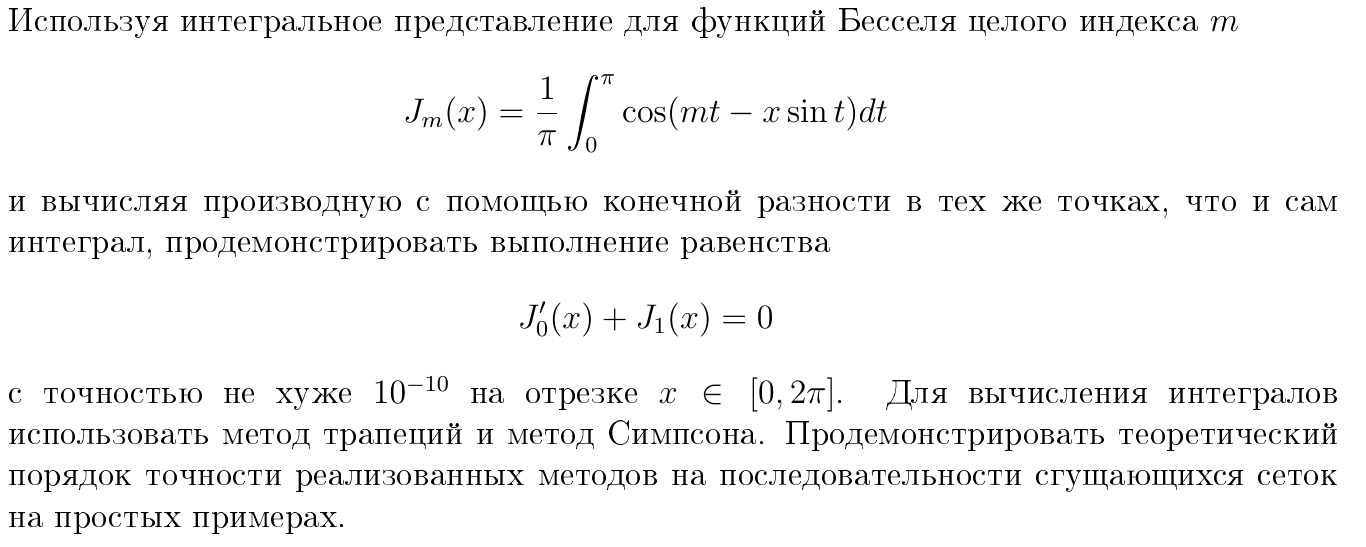

In [241]:
Image('task 4.png')

In [242]:
calc_points = 100
X = np.linspace(0, 2*np.pi, calc_points)[:, np.newaxis]

h = 1e-5

f = lambda x, t, m: (1 / np.pi) * np.cos(m * t - x * np.sin(t))

In [243]:
arr = np.array([1, 2, 3, 4])
anoter_arr = arr[:, np.newaxis]
arr = [0, 1, 2, 3, 4, 5, 6]

A = (anoter_arr*arr)[::,:2:]
B = (anoter_arr*arr)

print(B)

[[ 0  1  2  3  4  5  6]
 [ 0  2  4  6  8 10 12]
 [ 0  3  6  9 12 15 18]
 [ 0  4  8 12 16 20 24]]


In [244]:
integration_intervals = 100

def Simpson(x, m):
    step_size = np.pi/integration_intervals


    dots = np.linspace(0, np.pi, integration_intervals + 1)
    values = np.vectorize(f)(x, dots, m)

    return np.sum(values[::,0:-1:2] + values[::,2::2] + 4 * values[::,1::2], axis=1) * step_size / 3

def Trapeze(x, m):
    step_size = np.pi/integration_intervals

    dots = np.linspace(0, np.pi, integration_intervals+1)
    values = np.vectorize(f)(x, dots, m)

    return np.sum(values[::,1::] + values[::, :-1:], axis=1) * step_size / 2

In [245]:
j0_S = Simpson(X, 0)
j0_T = Trapeze(X, 0)

# j0_S_shifted = Simpson(X+2*h, 0)
# j0_T_shifted = Trapeze(X+2*h, 0)

dj0_S = (Simpson(X+h, 0) - Simpson(X-h, 0)) / (2*h)
dj0_T = (Trapeze(X+h, 0) - Trapeze(X-h, 0)) / (2*h)

j1_S = Simpson(X, 1)
j1_T = Trapeze(X, 1)

err_S = j1_S + dj0_S
err_T = j1_T + dj0_T

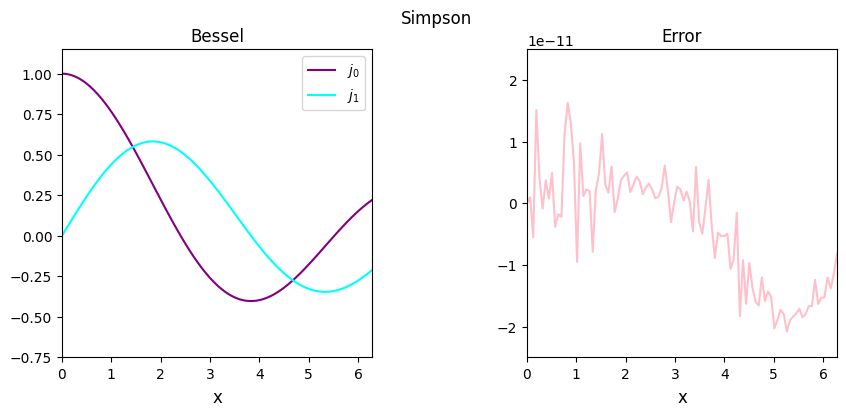

In [257]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle("Simpson")

plt_j = fig.add_subplot(121)
plt_err = fig.add_subplot(122)
plt_j.axis([X[0], X[-1], -0.75, 1.15])
plt_j.plot(X, j0_S, color='purple', label=r'$j_0$')
plt_j.plot(X, j1_S, color='cyan', label=r'$j_1$')
plt_j.set_xlabel('x', labelpad=5, fontsize=12)
plt_j.set_title('Bessel')
plt_j.legend()

plt_err.axis([X[0], X[-1], -2.5e-11, 2.5e-11])
plt_err.plot(X, err_S, color='pink', label='err')
plt_err.set_xlabel('x', labelpad=5, fontsize=12)
plt_err.set_title('Error')
# plt_err.legend()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

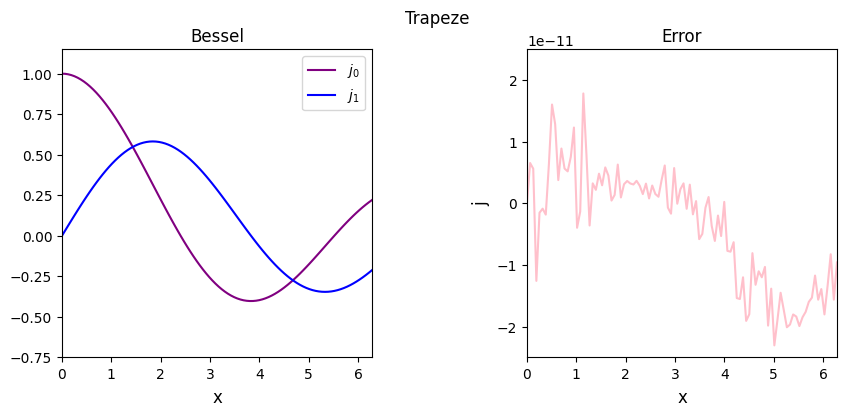

In [256]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle("Trapeze")

plt_j = fig.add_subplot(121)
plt_err = fig.add_subplot(122)
plt_j.axis([X[0], X[-1], -0.75, 1.15])
plt_j.plot(X, j0_T, color='purple', label=r'$j_0$')
plt_j.plot(X, j1_T, color='blue', label=r'$j_1$')
plt_j.set_xlabel('x', labelpad=5, fontsize=12)
plt_j.set_title('Bessel')
plt_j.legend()

plt_err.axis([X[0], X[-1], -2.5e-11, 2.5e-11])
plt_err.plot(X, err_T, color='pink', label='err')
plt_err.set_xlabel('x', labelpad=5, fontsize=12)
plt_err.set_ylabel('j', labelpad=5, fontsize=12)
plt_err.set_title('Error')
# plt_err.legend()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()